## Importing initial dataset and packages

In [104]:
# Importing initial packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
import os
import math

# Importing dataset
movies = pd.read_csv('movie_metadata.csv')

## Data quality check / cleaning / preparation 

### Initial data quality check
*By Lila Weiner and Gabrielle Bliss*

In [105]:
# Number of observations in dataset, undropped and dropped
print('Total number of observations in the dataset:', movies.shape[0])
print('Total number of observations in the dataset after dropping observations with null value(s):', movies.dropna().shape[0])

Total number of observations in the dataset: 5043
Total number of observations in the dataset after dropping observations with null value(s): 3756


In [106]:
# All columns/variables in the dataset
print(movies.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [107]:
# The distribution and number of missing values for each continuous variable in the dataset:
null_row = movies[movies.describe().columns].isnull().sum().to_dict()
describe = movies.describe()
describe = describe.append(pd.Series(null_row, index = describe.columns, name = 'null count'))
describe

/var/folders/6f/tmk9mhc93xz60c89qc9dr8kw0000gn/T/ipykernel_64271/941233888.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  describe = describe.append(pd.Series(null_row, index = describe.columns, name = 'null count'))


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000
null count,50.000000,15.000000,104.000000,23.000000,7.000000,8.840000e+02,0.000000e+00,0.000000,13.000000,21.000000,4.920000e+02,108.000000,13.000000,0.000000,329.000000,0.000000


In [108]:
# The null and unique values for each categorical variable in the datatset:
# Creating null series
null = pd.Series(movies[movies.columns[movies.dtypes == object]].isnull().sum(), name = 'Null Counts, Categorical')

# Creating unique values series
values = []
for i in movies.columns[movies.dtypes == object]: 
    ser = len(movies[str(i)].value_counts())
    values = values + [ser]
unique = pd.Series(values, index = movies.columns[movies.dtypes == object].to_list(), name = 'Unique Counts, Categorical')

# Concatenating into dataframe
pd.concat([null, unique], axis = 1)

,"Null Counts, Categorical","Unique Counts, Categorical"
color,19,2
director_name,104,2398
actor_2_name,13,3032
genres,0,914
actor_1_name,7,2097
movie_title,0,4917
actor_3_name,23,3521
plot_keywords,153,4760
movie_imdb_link,0,4919
language,12,47


In [109]:
# Top 3 values counts for each categorical variable
values = pd.Series([])
for i in movies.columns[movies.dtypes == object]: 
    ser = movies[str(i)].value_counts().sort_values(ascending = False)[0:3]
    values = pd.concat([values, ser])
    
values = pd.DataFrame(values) 
varr = np.array(values.iloc[:, 0])
# Adding multindex
vals = pd.DataFrame(varr, index = [['color']*2+['director_name']*3+['actor_2_name']*3+['genres']*3+['actor_1_name']*3
                              +['movie_title']*3+['actor_3_name']*3+['plot_keywords']*3+['movie_imdb_link']*3+
                              ['language']*3+['country']*3+['content_rating']*3, values.index], columns = ['Top 3 Value Counts, Categorical'])
vals 

/var/folders/6f/tmk9mhc93xz60c89qc9dr8kw0000gn/T/ipykernel_64271/3558023986.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  values = pd.Series([])


Top 3 Value Counts, Categorical
color           Color                                                                          4815
                 Black and White                                                                209
director_name   Steven Spielberg                                                                 26
                Woody Allen                                                                      22
                Clint Eastwood                                                                   20
actor_2_name    Morgan Freeman                                                                   20
                Charlize Theron                                                                  15
                Brad Pitt                                                                        14
genres          Drama                                                                           236
                Comedy                                                                          209
                Comedy|Drama                                                                    191
actor_1_name    Robert De Niro                                                                   49
                Johnny Depp                                                                      41
                Nicolas Cage                                                                     33
movie_title     Ben-Hur                                                                           3
                Pan                                                                               3
                King Kong                                                                         3
actor_3_name    John Heard                                                                        8
                Ben Mendelsohn                                                                    8
                Steve Coogan                                                                      8
plot_keywords   based on novel                                                                    4
                one word title                                                                    3
                assistant|experiment|frankenstein|medical stude...                                3
movie_imdb_link http://www.imdb.com/title/tt0232500/?ref_=fn_tt...                                3
                http://www.imdb.com/title/tt3332064/?ref_=fn_tt...                                3
                http://www.imdb.com/title/tt0360717/?ref_=fn_tt...                                3
language        English                                                                        4704
                French                                                                           73
                Spanish                                                                          40
country         USA                                                                            3807
                UK                                                                              448
                France                                                                          154
content_rating  R                                                                              2118
                PG-13                                                                          1461
                PG                                                                              701

The code below visualizes the distribution of all the current continuous variables in the dataset, and their association with the response for linear regression, gross.

In [110]:
# checking correlation of variables with gross
movies.corrwith(movies.gross).sort_values(ascending = False)

gross                        1.000000
num_voted_users              0.637271
num_user_for_reviews         0.559958
num_critic_for_reviews       0.480601
movie_facebook_likes         0.378082
actor_3_facebook_likes       0.308026
actor_2_facebook_likes       0.262768
duration                     0.250298
cast_total_facebook_likes    0.247400
imdb_score                   0.198021
actor_1_facebook_likes       0.154468
director_facebook_likes      0.144945
budget                       0.102179
aspect_ratio                 0.069346
title_year                   0.030886
facenumber_in_poster        -0.027755
dtype: float64

### Data quality check with logistic response variable
*By Kenneth Yeon and Riley Otsuki*

In [111]:
# Association of the response with the predictors 
# Creating binary classification variable
movies_log = movies.copy()
movies_log.dropna()
good_score = movies_log['imdb_score'].quantile(0.75)
movies_log['good_movie'] = movies_log['imdb_score'].apply(lambda x: 1 if x >= good_score else 0)
movies_log.corrwith(movies_log.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681022
num_voted_users              0.364947
num_user_for_reviews         0.272405
movie_facebook_likes         0.232860
num_critic_for_reviews       0.221334
duration                     0.200878
gross                        0.165646
director_facebook_likes      0.163755
aspect_ratio                 0.066005
actor_2_facebook_likes       0.043753
cast_total_facebook_likes    0.042055
actor_1_facebook_likes       0.038629
actor_3_facebook_likes       0.027265
budget                       0.000898
facenumber_in_poster        -0.066470
title_year                  -0.197580
dtype: float64

### Data cleaning / preparation
*By Gabrielle Bliss and Lila Weiner*

From the data quality check we realized that:

1. Some of the columns, such as genres, have multiple genres listed as one unique observation. We will split these values so that each movie has a column for each genre indicating whether the movie is classified as part of that genre or not. The genres also needed to be cleaned to become column names.
<br>

2. Many variables have less than 20% missing values, and it is not straightforward to impute their values. We'll remove observations with missing values from the data if necessary, or ignore these values through creating the models. 
<br>

3. Some variables in the data, cannot be used for prediction, as they are all measures recorded after a movie is already made. These variables include: 
- `num_voted_users`: The total number of users who interacted with the movie an voted on ratings
- `num_user_for_reviews`: The number of user reviews for a certain movie.
- `num_critic_for_reviews`: The number of critic reviews for a certain movie. 
<br>

The code below implements the above cleaning.

#### Creating genre columns

In [112]:
# Splitting the genres column by the delimiter in new dataframe, genres
genres = movies.genres.str.split("|", expand = True)
gen = [] 

# Looking for the unique genres from all possible classifications
for x in range(genres.shape[1]):
    u = genres.iloc[:, x].unique()
    gen = gen + list(u)

# Creating list of unique genres so they can be used as column names easily
genre_list = list(pd.DataFrame(gen).iloc[:, 0].unique())
genre_list.remove(None)

# Cleaning the genre_list variables
genre_list = ' '.join(genre_list).replace('-','_').split()
genre_list
print('Number of unique genres:', len(genre_list), '\n')
print(genre_list)

Number of unique genres: 26 

['Action', 'Documentary', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery', 'Fantasy', 'Crime', 'Biography', 'Sci_Fi', 'Horror', 'Romance', 'Thriller', 'Game_Show', 'Family', 'Music', 'Western', 'Musical', 'Film_Noir', 'History', 'War', 'Sport', 'Reality_TV', 'Short', 'News']


In [113]:
# Dataset with new columns for each genre
for i in range(len(genre_list)):
    movies[str(genre_list[i])] = movies.genres.apply(lambda x: 1 if str(genre_list[i]) in x else 0)
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Music,Western,Musical,Film_Noir,History,War,Sport,Reality_TV,Short,News
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,0,0,0,0,0,0,0,0,0,0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,0,0,0,0,0,0,0,0,0,0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,0,0,0,0,0,0,0,0,0,0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,0,0,0,0,0,0,0,0,0,0


### Data cleaning / preparation
*By Riley Otsuki and Kenneth Yeon*

The following data preparation steps helped us to prepare our data for logistic modeling / validation techniques:

1. Country column would benefit from splitting into new predictor columns as well, based on value counts.
<br>

2. Since we need to have a binary classification variable for IMDB rating, we derived a classification predictor *(from existing IMDB rating predictor)*. Used the criteria: if score is above 75% quartile movie is good (1), else bad (0).

**Creating country columns**

In [114]:
# Categorizes movie countries into 'USA', 'UK', and 'Others' and converts the 'country' column into a categorical data type
movies['country'] = pd.Categorical(movies['country'])

movies['country'] = movies['country'].cat.add_categories('Others')

movies.loc[~movies['country'].isin(['USA', 'UK']), 'country'] = 'Others'

# Dropping original country column
movies['country'] = pd.Categorical(movies['country'])

In [115]:
# Create dummy variables for the 'country' column
dummies = pd.get_dummies(movies['country'], prefix = 'country')

# Add the dummy variables to the original DataFrame
movies = pd.concat([movies, dummies], axis=1)

# Drop the original 'country' column
movies.drop('country', axis=1, inplace=True)

In [116]:
# Create a list of extra country columns to be removed
cols_to_remove = [col for col in movies.columns if col.startswith('country') and col not in ['country_USA', 'country_UK', 'country_Others']]

# Dropping the columns from the dataframe
movies.drop(cols_to_remove, axis=1, inplace=True)

print(list(movies.columns))

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Action', 'Documentary', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery', 'Fantasy', 'Crime', 'Biography', 'Sci_Fi', 'Horror', 'Romance', 'Thriller', 'Game_Show', 'Family', 'Music', 'Western', 'Musical', 'Film_Noir', 'History', 'War', 'Sport', 'Reality_TV', 'Short', 'News', 'country_UK', 'country_USA', 'country_Others']


In [117]:
movies_new = movies

**Creating binary classification variable, dropping null values for logistic**

In [118]:
# Creating binary classification variable
movies_log = movies.copy()
good_score = movies_log['imdb_score'].quantile(0.75)
movies_log['good_movie'] = movies_log['imdb_score'].apply(lambda x: 1 if x >= good_score else 0)

## Exploratory data analysis

### Regression EDA (Response: `gross`)
*By Lila Weiner and Gabrielle Bliss*

**Scatterplots for all relationships**

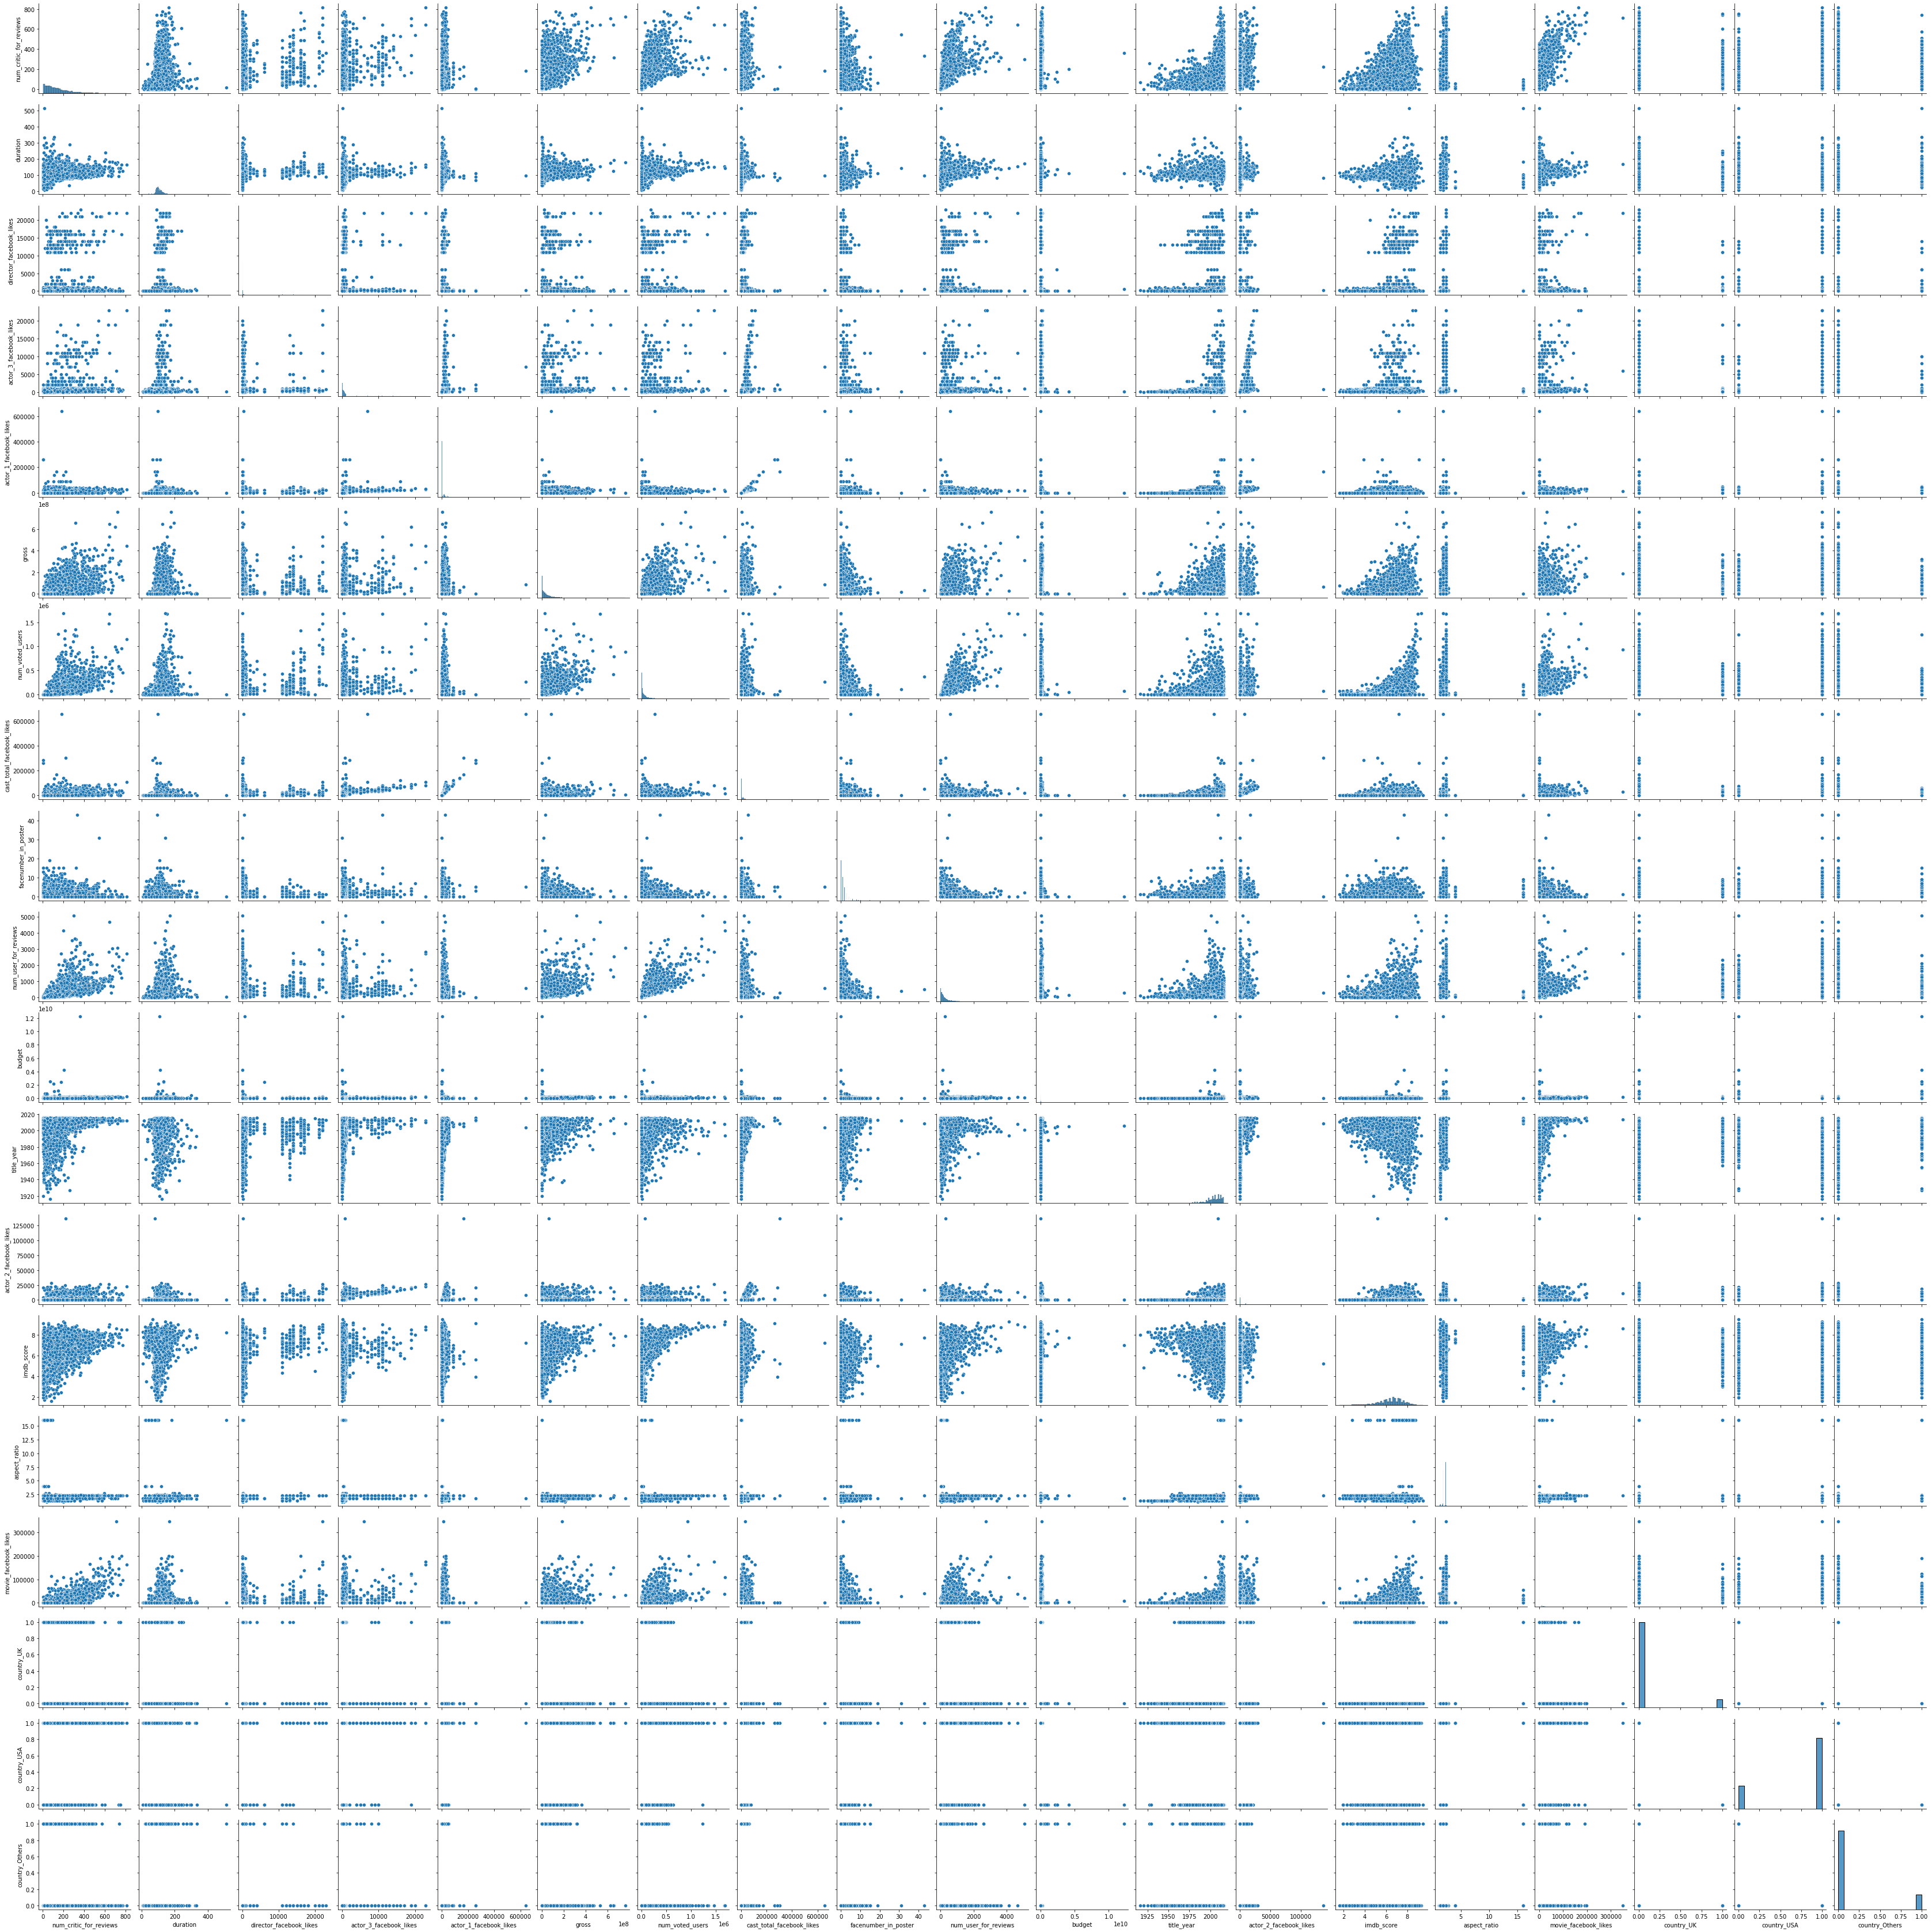

In [119]:
# A pairplot to visualize continuous variables
sns.pairplot(movies.drop(genre_list, axis = 1))

**Singular scatterplots for the usable variables with highest correlations**

In [120]:
# Again, the correlations of continuous variables with gross:
movies.corrwith(movies.gross).sort_values(ascending = True)

Drama                       -0.209524
country_Others              -0.164556
Documentary                 -0.079425
Crime                       -0.078227
country_UK                  -0.072526
Horror                      -0.072122
Biography                   -0.053399
Romance                     -0.052951
History                     -0.039047
War                         -0.030711
facenumber_in_poster        -0.027755
Music                       -0.027734
Sport                       -0.021211
Mystery                     -0.019385
Western                     -0.017128
Thriller                    -0.014431
Short                       -0.014274
Comedy                      -0.009179
News                        -0.007728
Musical                      0.011266
title_year                   0.030886
aspect_ratio                 0.069346
budget                       0.102179
director_facebook_likes      0.144945
actor_1_facebook_likes       0.154468
country_USA                  0.184425
Animation   

<AxesSubplot:xlabel='movie_facebook_likes', ylabel='gross'>

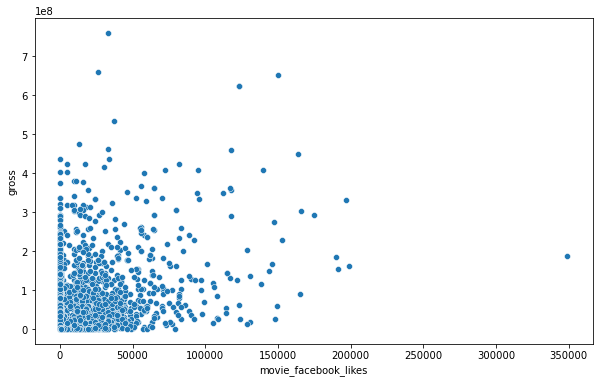

In [121]:
# gross vs. movie_facebook_likes
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x ='movie_facebook_likes',y = 'gross',data = movies)

<AxesSubplot:xlabel='cast_total_facebook_likes', ylabel='gross'>

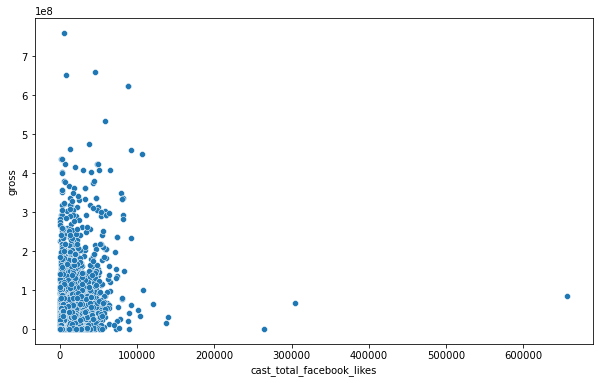

In [122]:
# gross vs. cast_total_facebook_likes
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x ='cast_total_facebook_likes',y = 'gross',data = movies)

**`duration` Distribution and Binning**

<AxesSubplot:xlabel='duration', ylabel='gross'>

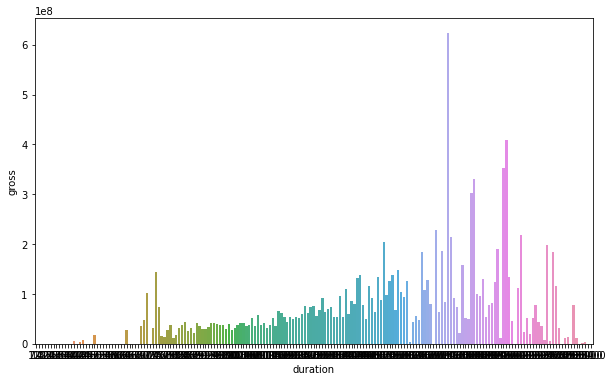

In [123]:
# gross vs. duration
plt.rcParams["figure.figsize"] = (10,6)
sns.barplot(x ='duration',y = 'gross',data = movies, ci = None)

In [124]:
# Binning duration in optimized minimum bins that still show trend (went through iterations, this worked best)
cut_bins = [0, 114, 122, 134, 511]
movies['binned_dur'] = pd.cut(movies['duration'], bins=cut_bins)

Text(0, 0.5, 'Gross')

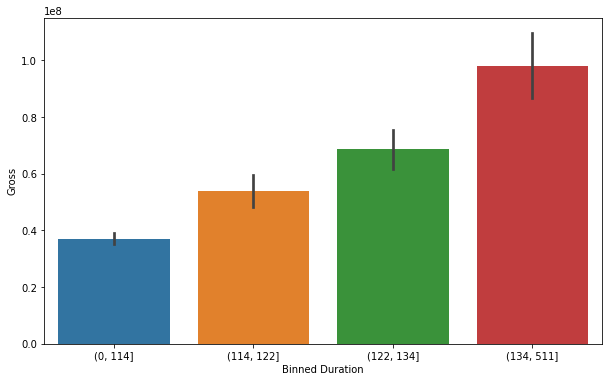

In [125]:
# Distribution with gross using duration bins
sns.barplot(x ='binned_dur',y = 'gross',data = movies)
plt.xlabel('Binned Duration')
plt.ylabel('Gross')

In [126]:
# Function to bin duration into decided optimal bins
def var_transform(data):
    data['duration_binned'] = pd.cut(data['duration'], bins=cut_bins)
    dum = pd.get_dummies(data.duration_binned,drop_first = True)
    dum.columns = ['duration'+str(x) for x in range(1,len(cut_bins)-1)]
    data = pd.concat([data,dum], axis = 1)
    return data

# Transforming movies dataset with these bins
movies_transformed = var_transform(movies)
movies_transformed

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Short,News,country_UK,country_USA,country_Others,binned_dur,duration_binned,duration1,duration2,duration3
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,1,0,"(134.0, 511.0]","(134.0, 511.0]",0,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,1,0,"(134.0, 511.0]","(134.0, 511.0]",0,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,1,0,0,"(134.0, 511.0]","(134.0, 511.0]",0,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,1,0,"(134.0, 511.0]","(134.0, 511.0]",0,0,1
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,0,0,0,0,1,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,0,0,0,0,1,"(0.0, 114.0]","(0.0, 114.0]",0,0,0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,0,0,0,1,0,"(0.0, 114.0]","(0.0, 114.0]",0,0,0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,0,0,0,1,0,"(0.0, 114.0]","(0.0, 114.0]",0,0,0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,0,0,0,1,0,"(0.0, 114.0]","(0.0, 114.0]",0,0,0


**`title_year` exploration**

Text(0, 0.5, 'count')

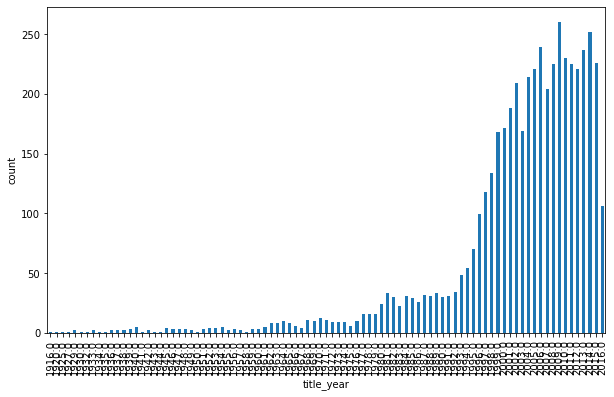

In [127]:
# Calculate sum of counts for each year
df_groups = movies.groupby('title_year')['movie_title'].count()

# Create bar plot by group
df_groups.plot(kind = 'bar')
plt.ylabel('count')

<AxesSubplot:xlabel='title_year', ylabel='gross'>

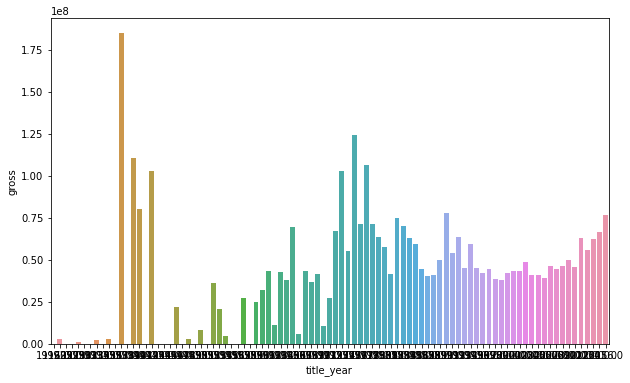

In [128]:
# gross vs. title_year
sns.barplot(data = movies, x = movies.title_year, y = movies.gross, ci = None)

**`genres` dummies exploration**

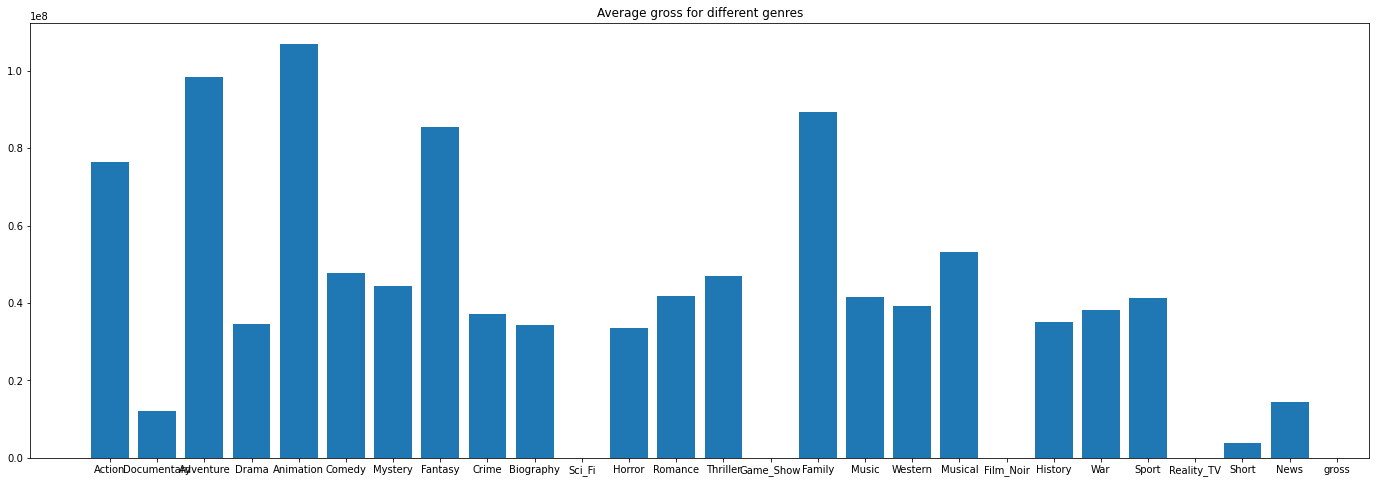

In [129]:
# Extracts the genre columns and gross revenue from the 'movies' dataframe, computes the mean gross revenue for each genre, and stores them in a list called 'means
genres_df = movies[[str(x) for x in genre_list]]
genres_df = pd.concat([genres_df, movies.gross], axis = 1)

means = []
for column in genres_df.columns:
    means.append(genres_df.loc[genres_df[column] == 1, "gross"].mean())

# Plotting mean of gross for each genre
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns, height=means)
plt.title("Average gross for different genres")
plt.show()

**`country` dummies exploration**

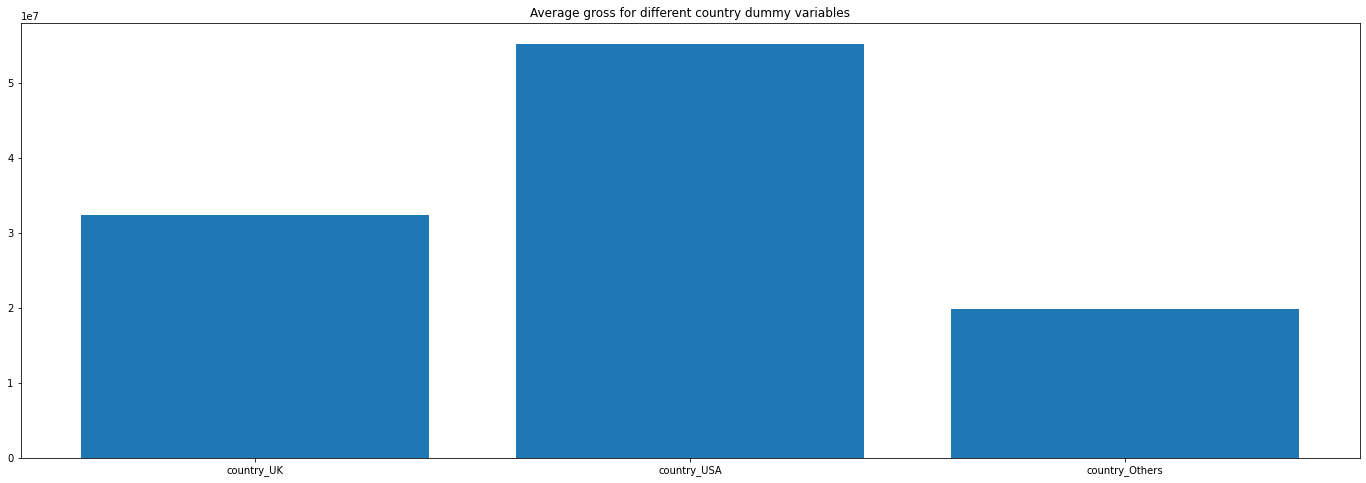

In [130]:
# Isolate dummy variables for countries and gross
country_df = movies[['country_UK', 'country_USA', 'country_Others', 'gross']]

# Computing means for each dummy
means = []
for column in country_df.columns:
    means.append(country_df.loc[country_df[column] == 1, "gross"].mean())

# Plotting gross vs. country dummies    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=country_df.columns, height=means)
plt.title("Average gross for different country dummy variables")
plt.show()

### Additional Logistic EDA (Response: `good_movie`)
*By Riley Otsuki and Kenny Yeon*

**`genre` exploration with IMDB**

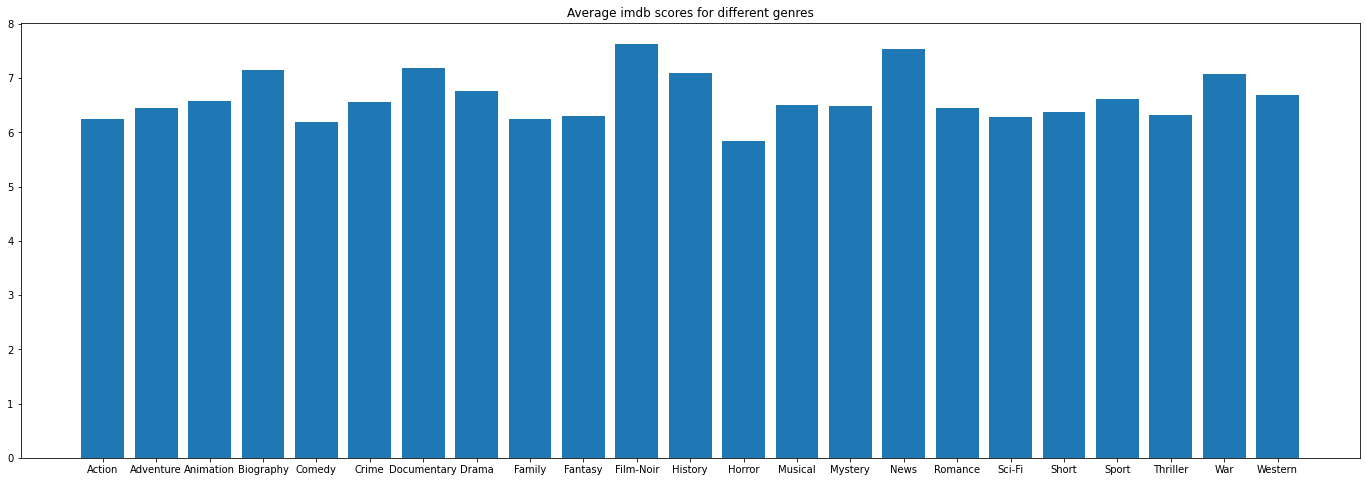

In [131]:
# Creates new binary columns for each genre in the 'genres' column of the 'movies' dataframe.
genres_df = movies.loc[:, ["genres", "imdb_score"]].copy()

genres_df["Action"] = [1 if "Action" in genre else 0 for genre in genres_df["genres"]]
genres_df["Adventure"] = [1 if "Adventure" in genre else 0 for genre in genres_df["genres"]]
genres_df["Animation"] = [1 if "Animation" in genre else 0 for genre in genres_df["genres"]]
genres_df["Biography"] = [1 if "Biography" in genre else 0 for genre in genres_df["genres"]]
genres_df["Comedy"] = [1 if "Comedy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Crime"] = [1 if "Crime" in genre else 0 for genre in genres_df["genres"]]
genres_df["Documentary"] = [1 if "Documentary" in genre else 0 for genre in genres_df["genres"]]
genres_df["Drama"] = [1 if "Drama" in genre else 0 for genre in genres_df["genres"]]
genres_df["Family"] = [1 if "Family" in genre else 0 for genre in genres_df["genres"]]
genres_df["Fantasy"] = [1 if "Fantasy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Film-Noir"] = [1 if "Film-Noir" in genre else 0 for genre in genres_df["genres"]]
genres_df["History"] = [1 if "History" in genre else 0 for genre in genres_df["genres"]]
genres_df["Horror"] = [1 if "Horror" in genre else 0 for genre in genres_df["genres"]]
genres_df["Musical"] = [1 if "Musical" in genre else 0 for genre in genres_df["genres"]]
genres_df["Mystery"] = [1 if "Mystery" in genre else 0 for genre in genres_df["genres"]]
genres_df["News"] = [1 if "News" in genre else 0 for genre in genres_df["genres"]]
genres_df["Romance"] = [1 if "Romance" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sci-Fi"] = [1 if "Sci-Fi" in genre else 0 for genre in genres_df["genres"]]
genres_df["Short"] = [1 if "Short" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sport"] = [1 if "Sport" in genre else 0 for genre in genres_df["genres"]]
genres_df["Thriller"] = [1 if "Thriller" in genre else 0 for genre in genres_df["genres"]]
genres_df["War"] = [1 if "War" in genre else 0 for genre in genres_df["genres"]]
genres_df["Western"] = [1 if "Western" in genre else 0 for genre in genres_df["genres"]]

# Computes the mean imdb score for each genre, and stores them in a list called 'means'
means = []
for column in genres_df.columns[2:]:
    means.append(genres_df.loc[genres_df[column] == 1, "imdb_score"].mean())

    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns[2:], height=means)
plt.title("Average imdb scores for different genres")
plt.show()

**creating `actors_facebook_likes` variable and exploration**

In [132]:
# Combining all actor facebook likes
movies_log['actors_facebook_likes'] = movies_log['actor_1_facebook_likes'] + movies_log['actor_2_facebook_likes'] + movies_log['actor_3_facebook_likes']

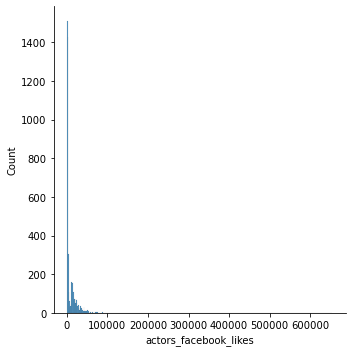

In [133]:
sns.displot(movies_log, x="actors_facebook_likes")

In [134]:
# If the actors have facebook likes greater than 75% of the others, they are famous (1) else not (0)
famous = movies_log['actors_facebook_likes'].quantile(0.7)
movies_log['actors_facebook_likes'] = movies_log['actors_facebook_likes'].apply(lambda x: 1 if x > famous else 0)

## Developing the model

### Data preparation for linear model development
*By Gabrielle Bliss*

The following data preparation steps helped us to prepare our data for implementing various regression modeling / validation techniques after all the previous EDA and transformations:

1. We have created a validation set by splitting the data 80/20 train/test.
<br>

2. We have shuffled the dataset to prepare it for K-fold cross validation.
<br>

2. We have created a standardized version of the dataset, as we will use it to develop Lasso regression models for the linear regression model for `gross`.
<br>

In [135]:
# Setting validation set seed
np.random.seed(2)

# 80% to be training
train = movies_transformed.sample(round(movies.shape[0]*.8))

# drop the train data from the test df
test = movies_transformed.drop(train.index)

In [136]:
#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
moviesk = movies_transformed.sample(frac=1)
k = 5 #5-fold cross validation
fold_size = np.round(moviesk.shape[0]/k)-1

In [137]:
# Function for K-fold cross validation for 5 folds, input formula to do K-fold
def KFoldCV(formula):
    fold_1 = moviesk.iloc[np.arange(0*fold_size,1*fold_size), :]
    fold_2 = moviesk.iloc[np.arange(1*fold_size,2*fold_size), :]
    fold_3 = moviesk.iloc[np.arange(2*fold_size,3*fold_size), :]
    fold_4 = moviesk.iloc[np.arange(3*fold_size,4*fold_size), :]
    fold_5 = moviesk.iloc[np.arange(4*fold_size,5*fold_size), :]
    test_1 = fold_1
    train_1 = pd.concat([fold_2, fold_3, fold_4, fold_5])
    test_2 = fold_2
    train_2 = pd.concat([fold_1, fold_3, fold_4, fold_5])
    test_3 = fold_3
    train_3 = pd.concat([fold_1, fold_2, fold_4, fold_5])
    test_4 = fold_4
    train_4 = pd.concat([fold_1, fold_2, fold_3, fold_5])
    test_5 = fold_5
    train_5 = pd.concat([fold_1, fold_2, fold_3, fold_4])
    model1 = smf.ols(formula = formula, data = train_1).fit()
    model2 = smf.ols(formula = formula, data = train_2).fit()
    model3 = smf.ols(formula = formula, data = train_3).fit()
    model4 = smf.ols(formula = formula, data = train_4).fit()
    model5 = smf.ols(formula = formula, data = train_5).fit()
    mae1 = np.abs(test_1.gross - model1.predict(test_1)).mean()
    mae2 = np.abs(test_2.gross - model2.predict(test_2)).mean()
    mae3 = np.abs(test_3.gross - model3.predict(test_3)).mean()
    mae4 = np.abs(test_4.gross - model4.predict(test_4)).mean()
    mae5 = np.abs(test_5.gross - model5.predict(test_5)).mean()
    maes = pd.Series([mae1, mae2, mae3, mae4, mae5])
    return maes.mean()

In [138]:
# Standardizing the train and test datasets for Lasso

# Importing packages needed for Lasso regression
import itertools
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

# Standardizing numerical predictors so that each of them have zero mean and unit variance
movies2 = movies_transformed.dropna()
movies2 = movies2.reset_index()

# Setting validation set seed for new dropped dataset
np.random.seed(2)

# 80% to be training
train_lasso = movies2.sample(round(movies2.shape[0]*.8))

# drop the train data from the test df
test_lasso = movies2.drop(train_lasso.index)

X = train_lasso[['budget', 'movie_facebook_likes', 'cast_total_facebook_likes', 'director_facebook_likes', 'title_year', 'country_USA', 'country_UK', 'Action', 'Adventure', 'Family', 'Fantasy', 'Animation', 'duration1', 'duration2', 'duration3']]
Xtest = train_lasso[['budget', 'movie_facebook_likes', 'cast_total_facebook_likes', 'director_facebook_likes', 'title_year', 'country_USA', 'country_UK', 'Action', 'Adventure', 'Family', 'Fantasy', 'Animation', 'duration1', 'duration2', 'duration3']]

# Defining a scaler object
scaler = StandardScaler()

# The scaler object will contain the mean and variance of each column (predictor) of X. 
# These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)
scaler.fit(Xtest)

# Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)
Xstd_test = scaler.transform(Xtest)

### Linear Model Development for `gross` in iterations
*By Gabrielle Bliss and Lila Weiner*

The following code outlines each iteration of our model, beginning with the baseline.

**1. Baseline Model**
<br>

In [139]:
# Splitting original movies set into same test and train so we can use our original code without it including the dummies, etc.
movies_og = pd.read_csv('movie_metadata.csv')

# Setting validation set seed
np.random.seed(2)

# 80% to be training
train_og = movies_og.sample(round(movies.shape[0]*.8))

# drop the train data from the test df
test_og = movies_og.drop(train.index)

In [140]:
# Model with all usable continuous variables/predictors, isolating these and using in reg model
cont_varib = movies_og.corrwith(movies_og.gross).drop(['gross', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'num_critic_for_reviews']).index.to_list()
model = smf.ols(formula = 'gross~aspect_ratio+'+ '+'.join([str(x) for x in cont_varib]), data = train_og).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     95.50
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.23e-186
Time:                        10:09:33   Log-Likelihood:                -58814.
No. Observations:                3043   AIC:                         1.177e+05
Df Residuals:                    3031   BIC:                         1.177e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                      7e+08   2.45e+08      2.857      0.004     2.2e+08    1.18e+09
aspect_ratio               2.236e+06   3.07e+06      0.729      0.466   -3.78e+06    8.25e+06
duration                   3.642e+05    5.1e+04      7.139      0.000    2.64e+05    4.64e+05
director_facebook_likes    1076.0374    373.421      2.882      0.004     343.853    1808.222
actor_3_facebook_likes    -1.107e+04   1704.317     -6.497      0.000   -1.44e+04   -7731.968
actor_1_facebook_likes     -1.15e+04    984.873    -11.681      0.000   -1.34e+04   -9573.335
cast_total_facebook_likes  1.163e+04    983.389     11.829      0.000    9703.883    1.36e+04
facenumber_in_poster      -2.056e+06   5.62e+05     -3.656      0.000   -3.16e+06   -9.53e+05
budget                        0.0149      0.004      3.416      0.001       0.006       0.024
title_year                -3.564e+05   1.22e+05     -2.912      0.004   -5.96e+05   -1.16e+05
actor_2_facebook_likes    -1.087e+04   1037.488    -10.476      0.000   -1.29e+04   -8833.976
movie_facebook_likes        906.8933     61.447     14.759      0.000     786.410    1027.376
==============================================================================
Omnibus:                     1487.146   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11678.839
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      11.552   Cond. No.                     5.73e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# Computing MAE on test data/validation set
predictions = model.predict(test_og)
(np.abs(test_og.gross - predictions)).mean()

38860918.36373938

In [142]:
# Computing MAE by K-fold
moviesk = movies_og
KFoldCV(formula = 'gross~aspect_ratio+'+ '+'.join([str(x) for x in cont_varib]))

42318219.82592992

**2. Beginning of manual forward selection, adding `facebook_likes` variables**
<br>

*VIF Analysis*

<AxesSubplot:>

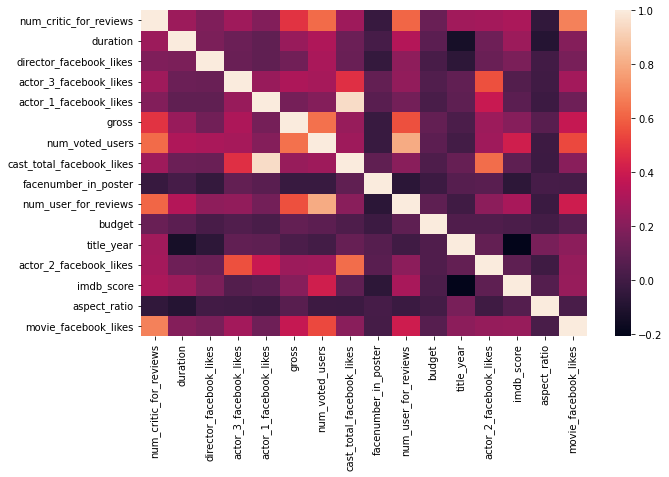

In [143]:
# Correlation visual to help inform what varibales to analyze for VIF
sns.heatmap(movies_og.corr())

In [144]:
# Importing packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Dropping the NA values for our VIF analysis
movies2 = movies.dropna()
movies2 = movies2.reset_index()

# VIF analysis of `facebook_likes`: 
X = movies2[['actor_1_facebook_likes', 'actor_3_facebook_likes','actor_2_facebook_likes','director_facebook_likes','cast_total_facebook_likes', 'movie_facebook_likes']]
X.columns[1:]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                     feature         VIF
0                      const    1.694919
1     actor_1_facebook_likes  201.147594
2     actor_3_facebook_likes    8.353041
3     actor_2_facebook_likes   19.287085
4    director_facebook_likes    1.037344
5  cast_total_facebook_likes  303.215284
6       movie_facebook_likes    1.113454


In [145]:
# Computing new VIF after removing collinear variables, `actor_1_facebook_likes`, `actor_2_facebook_likes`, `actor_3_facebook_likes`
movies2 = movies.dropna()
movies2 = movies2.reset_index()

X = movies2[['director_facebook_likes','cast_total_facebook_likes', 'movie_facebook_likes']]
X.columns[1:]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                     feature       VIF
0                      const  1.487409
1    director_facebook_likes  1.035005
2  cast_total_facebook_likes  1.052322
3       movie_facebook_likes  1.065483


In [146]:
# Model Attempt: a model of gross and facebook likes
model = smf.ols('gross~movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.10e-139
Time:                        10:09:38   Log-Likelihood:                -64324.
No. Observations:                3323   AIC:                         1.287e+05
Df Residuals:                    3319   BIC:                         1.287e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.126e+07   1.29e+06     24.195      0.000    2.87e+07    3.38e+07
movie_facebook_likes       1154.2854     56.184     20.545      0.000    1044.126    1264.445
cast_total_facebook_likes   584.8123     56.825     10.291      0.000     473.396     696.228
director_facebook_likes    1980.6577    373.619      5.301      0.000    1248.110    2713.205
==============================================================================
Omnibus:                     1762.269   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16329.299
Skew:                           2.355   Prob(JB):                         0.00
Kurtosis:                      12.785   Cond. No.                     3.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

40075675.65587589

In [148]:
# Computing MAE by K-fold
moviesk = movies_transformed
KFoldCV(formula = 'gross~movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+actor_3_facebook_likes+actor_2_facebook_likes')

43398346.37183257

**3. Adding `binned_duration` variables `duration1`, `duration2`, etc.**
<br>

In [149]:
#Model Attempt: adding binned duration
model = smf.ols('gross~movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     144.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.17e-162
Time:                        10:09:42   Log-Likelihood:                -64260.
No. Observations:                3323   AIC:                         1.285e+05
Df Residuals:                    3316   BIC:                         1.286e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   2.65e+07    1.4e+06     18.998      0.000    2.38e+07    2.92e+07
movie_facebook_likes       1035.4058     56.226     18.415      0.000     925.165    1145.646
cast_total_facebook_likes   540.6592     55.972      9.659      0.000     430.916     650.403
director_facebook_likes    1286.6332    371.921      3.459      0.001     557.414    2015.852
duration1                  8.673e+06   3.38e+06      2.569      0.010    2.05e+06    1.53e+07
duration2                  1.629e+07   3.55e+06      4.586      0.000    9.33e+06    2.33e+07
duration3                  4.031e+07   3.67e+06     10.979      0.000    3.31e+07    4.75e+07
==============================================================================
Omnibus:                     1679.164   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14032.381
Skew:                           2.251   Prob(JB):                         0.00
Kurtosis:                      12.004   Cond. No.                     9.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

39230172.87603779

In [151]:
# Computing MAE by K-fold
moviesk = movies_transformed
KFoldCV(formula = 'gross~movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+' + '+'.join(['duration'+str(x) for x in range(1,4)]))

42794172.927417986

**4. Adding `budget` and transformed (`sqrt(budget`) variable based on residuals plot**

*Residuals from model with only `budget` predicting `gross`, exploration of `budget`*

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

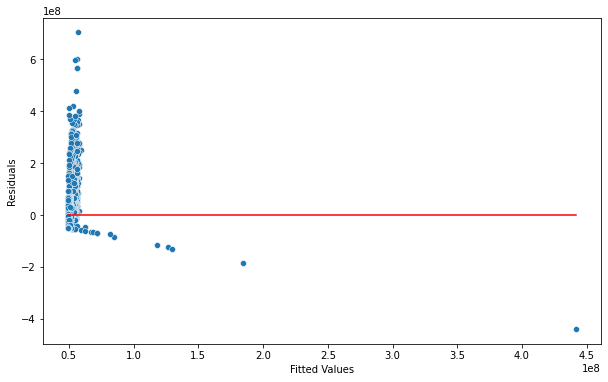

In [152]:
# Residual plot for gross~budget to look at model assumptions and make conclusions about budget variable
model = smf.ols(formula = 'gross~budget', data = movies).fit()
sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'red')

In [153]:
# Adding budget and transformed budget to model 2, +np.log(budget)+budget
model = smf.ols('gross~budget+I(np.sqrt(budget))+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.39e-315
Time:                        10:09:45   Log-Likelihood:                -59855.
No. Observations:                3112   AIC:                         1.197e+05
Df Residuals:                    3103   BIC:                         1.198e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.627e+07   1.99e+06     -8.166      0.000   -2.02e+07   -1.24e+07
budget                       -0.1154      0.006    -19.317      0.000      -0.127      -0.104
I(np.sqrt(budget))         1.106e+04    375.439     29.457      0.000    1.03e+04    1.18e+04
movie_facebook_likes        763.5448     51.824     14.734      0.000     661.933     865.157
cast_total_facebook_likes   298.4510     51.503      5.795      0.000     197.468     399.434
director_facebook_likes    1100.0149    339.097      3.244      0.001     435.137    1764.892
duration1                  8.272e+05   3.15e+06      0.263      0.793   -5.35e+06       7e+06
duration2                 -1.646e+06   3.36e+06     -0.490      0.624   -8.23e+06    4.94e+06
duration3                  1.823e+07   3.45e+06      5.279      0.000    1.15e+07     2.5e+07
==============================================================================
Omnibus:                     1393.752   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13539.096
Skew:                           1.874   Prob(JB):                         0.00
Kurtosis:                      12.506   Cond. No.                     1.00e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

33023615.74660043

In [155]:
# Computing MAE by K-fold
moviesk = movies_transformed
KFoldCV(formula = 'gross~budget+np.sqrt(budget)+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+' + '+'.join(['duration'+str(x) for x in range(1,4)]))

34118265.36149276

**5. Adding title_year and top 5 most correlated `genre` variables, as well as interaction term with `title_year` and the `genres`**

In [156]:
# Creating df of just genres to correlate
genres_df = movies_transformed[[str(x) for x in genre_list]]
genres_df = pd.concat([genres_df, movies_transformed.gross], axis = 1)

# Correlations between genres and gross
genres_df.corrwith(genres_df.gross).drop(['Sci_Fi', 'Film_Noir', 'Reality_TV', 'Game_Show', 'gross']).sort_values(ascending = False)

Adventure      0.359086
Action         0.226441
Family         0.213204
Fantasy        0.206023
Animation      0.194067
Musical        0.011266
News          -0.007728
Comedy        -0.009179
Short         -0.014274
Thriller      -0.014431
Western       -0.017128
Mystery       -0.019385
Sport         -0.021211
Music         -0.027734
War           -0.030711
History       -0.039047
Romance       -0.052951
Biography     -0.053399
Horror        -0.072122
Crime         -0.078227
Documentary   -0.079425
Drama         -0.209524
dtype: float64

In [157]:
# Model with added genres iteracted with title_year
model = smf.ols('gross~budget+I(np.sqrt(budget))+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:09:47   Log-Likelihood:                -59740.
No. Observations:                3112   AIC:                         1.195e+05
Df Residuals:                    3092   BIC:                         1.196e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.671e+09   2.58e+08      6.468      0.000    1.16e+09    2.18e+09
budget                       -0.1000      0.006    -15.713      0.000      -0.112      -0.087
I(np.sqrt(budget))         9525.2657    450.174     21.159      0.000    8642.596    1.04e+04
movie_facebook_likes        913.3745     53.463     17.084      0.000     808.548    1018.201
cast_total_facebook_likes   345.2497     49.861      6.924      0.000     247.486     443.013
director_facebook_likes    1072.9396    329.221      3.259      0.001     427.426    1718.453
title_year                -8.431e+05   1.29e+05     -6.533      0.000    -1.1e+06    -5.9e+05
Action                      1.06e+09   5.01e+08      2.115      0.035    7.71e+07    2.04e+09
Adventure                 -1.328e+09   4.96e+08     -2.681      0.007    -2.3e+09   -3.57e+08
Family                     2.704e+07   7.37e+08      0.037      0.971   -1.42e+09    1.47e+09
Fantasy                    1.358e+09   6.24e+08      2.176      0.030    1.34e+08    2.58e+09
Animation                 -1.629e+09   1.03e+09     -1.581      0.114   -3.65e+09    3.91e+08
title_year:Action         -5.282e+05    2.5e+05     -2.110      0.035   -1.02e+06   -3.75e+04
title_year:Adventure       6.702e+05   2.48e+05      2.708      0.007    1.85e+05    1.16e+06
title_year:Family         -3998.2967   3.68e+05     -0.011      0.991   -7.25e+05    7.17e+05
title_year:Fantasy        -6.753e+05   3.12e+05     -2.168      0.030   -1.29e+06   -6.46e+04
title_year:Animation       8.193e+05   5.14e+05      1.594      0.111   -1.88e+05    1.83e+06
duration1                  3.996e+06   3.09e+06      1.291      0.197   -2.07e+06    1.01e+07
duration2                  2.066e+05   3.34e+06      0.062      0.951   -6.34e+06    6.75e+06
duration3                  1.845e+07   3.54e+06      5.209      0.000    1.15e+07    2.54e+07
==============================================================================
Omnibus:                     1334.810   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13261.665
Skew:                           1.766   Prob(JB):                         0.00
Kurtosis:                      12.476   Cond. No.                     3.01e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

32243359.882436555

In [159]:
# Computing MAE by K-fold
moviesk = movies_transformed
KFoldCV(formula = 'gross~budget+I(np.sqrt(budget))+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]))

33572343.861971006

**5. Adding dummy variables for most correlated, most prevalent `country` of origin**

In [160]:
# Correlations of country dummies with gross
movies_transformed[['country_UK', 'country_USA', 'country_Others']].corrwith(movies_transformed.gross).sort_values(ascending = False)

country_USA       0.184425
country_UK       -0.072526
country_Others   -0.164556
dtype: float64

In [161]:
# Model adding top two correlated country dummies
model = smf.ols('gross~country_UK+country_USA+(country_USA+country_UK)*budget+budget+I(np.sqrt(budget))+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:09:50   Log-Likelihood:                -59496.
No. Observations:                3112   AIC:                         1.190e+05
Df Residuals:                    3088   BIC:                         1.192e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   1.37e+09    2.4e+08      5.711      0.000       9e+08    1.84e+09
country_UK                 -2.39e+07   4.81e+06     -4.966      0.000   -3.33e+07   -1.45e+07
country_USA               -5.091e+06    3.1e+06     -1.643      0.100   -1.12e+07    9.84e+05
budget                       -0.0158      0.007     -2.240      0.025      -0.030      -0.002
country_USA:budget            0.8609      0.043     20.089      0.000       0.777       0.945
country_UK:budget             0.9910      0.083     11.933      0.000       0.828       1.154
I(np.sqrt(budget))         1314.6933    568.026      2.314      0.021     200.946    2428.440
movie_facebook_likes        776.1380     50.007     15.521      0.000     678.087     874.189
cast_total_facebook_likes   249.6030     46.432      5.376      0.000     158.563     340.643
director_facebook_likes     731.9452    305.768      2.394      0.017     132.416    1331.474
title_year                -6.805e+05    1.2e+05     -5.682      0.000   -9.15e+05   -4.46e+05
Action                     1.848e+09   4.66e+08      3.967      0.000    9.35e+08    2.76e+09
Adventure                   4.76e+08   4.67e+08      1.019      0.308    -4.4e+08    1.39e+09
Family                     1.567e+08   6.82e+08      0.230      0.818   -1.18e+09    1.49e+09
Fantasy                    1.501e+09   5.78e+08      2.597      0.009    3.68e+08    2.63e+09
Animation                 -8.909e+08   9.55e+08     -0.933      0.351   -2.76e+09    9.81e+08
title_year:Action         -9.244e+05   2.33e+05     -3.975      0.000   -1.38e+06   -4.68e+05
title_year:Adventure      -2.357e+05   2.33e+05     -1.009      0.313   -6.93e+05    2.22e+05
title_year:Family         -7.083e+04   3.41e+05     -0.208      0.835   -7.39e+05    5.97e+05
title_year:Fantasy        -7.485e+05   2.89e+05     -2.594      0.010   -1.31e+06   -1.83e+05
title_year:Animation       4.502e+05   4.76e+05      0.946      0.344   -4.83e+05    1.38e+06
duration1                  3.867e+06   2.87e+06      1.348      0.178   -1.76e+06    9.49e+06
duration2                 -7.365e+05    3.1e+06     -0.238      0.812   -6.81e+06    5.34e+06
duration3                  1.212e+07   3.31e+06      3.659      0.000    5.63e+06    1.86e+07
==============================================================================
Omnibus:                     1395.194   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12028.360
Skew:                           1.919   Prob(JB):                         0.00
Kurtosis:                      11.834   Cond. No.                     3.02e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [162]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

30340858.80801303

In [163]:
# Computing MAE by K-fold
moviesk = movies_transformed
KFoldCV(formula = 'gross~country_UK+country_USA+(country_USA+country_UK)*budget+budget+np.sqrt(budget)+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]))

29259621.72319718

*Removing influential points from model*

In [164]:
# Outliers datafram for model
out = model.outlier_test()

#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag

In [165]:
#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage

0.007712082262210797

In [166]:
#We will remove all observations that have leverage higher than the threshold value.
high_leverage_threshold = 4*average_leverage

#Number of high leverage points in the dataset
np.sum(leverage>high_leverage_threshold)

63

In [167]:
#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [168]:
model = smf.ols('gross~country_UK+country_USA+(country_USA+country_UK)*budget+budget+I(np.sqrt(budget))+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data=train_filtered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:10:09   Log-Likelihood:                -59459.
No. Observations:                3110   AIC:                         1.190e+05
Df Residuals:                    3086   BIC:                         1.191e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.369e+09    2.4e+08      5.707      0.000    8.99e+08    1.84e+09
country_UK                -2.389e+07   4.81e+06     -4.961      0.000   -3.33e+07   -1.44e+07
country_USA               -5.081e+06    3.1e+06     -1.639      0.101   -1.12e+07    9.98e+05
budget                       -0.0158      0.007     -2.238      0.025      -0.030      -0.002
country_USA:budget            0.8607      0.043     20.070      0.000       0.777       0.945
country_UK:budget             0.9907      0.083     11.924      0.000       0.828       1.154
I(np.sqrt(budget))         1313.8297    568.206      2.312      0.021     199.730    2427.929
movie_facebook_likes        776.0382     50.024     15.513      0.000     677.955     874.122
cast_total_facebook_likes   249.5284     46.450      5.372      0.000     158.452     340.605
director_facebook_likes     731.5793    305.874      2.392      0.017     131.842    1331.317
title_year                -6.802e+05    1.2e+05     -5.677      0.000   -9.15e+05   -4.45e+05
Action                     1.847e+09   4.66e+08      3.964      0.000    9.34e+08    2.76e+09
Adventure                  4.735e+08   4.68e+08      1.013      0.311   -4.43e+08    1.39e+09
Family                     1.581e+08   6.82e+08      0.232      0.817   -1.18e+09     1.5e+09
Fantasy                    1.502e+09   5.78e+08      2.597      0.009    3.68e+08    2.64e+09
Animation                  -8.92e+08   9.55e+08     -0.934      0.350   -2.76e+09     9.8e+08
title_year:Action         -9.241e+05   2.33e+05     -3.972      0.000   -1.38e+06   -4.68e+05
title_year:Adventure      -2.344e+05   2.34e+05     -1.004      0.316   -6.92e+05    2.24e+05
title_year:Family         -7.157e+04   3.41e+05     -0.210      0.834    -7.4e+05    5.97e+05
title_year:Fantasy        -7.486e+05   2.89e+05     -2.594      0.010   -1.31e+06   -1.83e+05
title_year:Animation       4.508e+05   4.76e+05      0.946      0.344   -4.83e+05    1.38e+06
duration1                  3.873e+06   2.87e+06      1.349      0.177   -1.75e+06     9.5e+06
duration2                 -7.314e+05    3.1e+06     -0.236      0.813   -6.81e+06    5.35e+06
duration3                  1.217e+07   3.32e+06      3.665      0.000    5.66e+06    1.87e+07
==============================================================================
Omnibus:                     1393.560   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11998.896
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                      11.825   Cond. No.                     3.02e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [169]:
# Computing MAE on test data/validation set
predictions = model.predict(test)
(np.abs(test.gross - predictions)).mean()

30339978.224552214

Text(0, 0.5, 'Predicted gross')

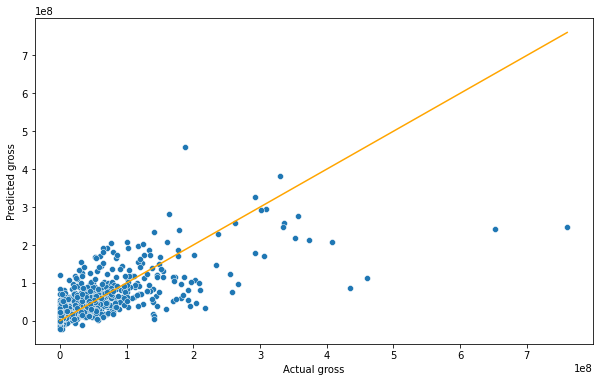

In [170]:
# Plot of regression model
predictions = model.predict(test)
sns.scatterplot(x = test.gross, y = predictions)
sns.lineplot(x = [0,test.gross.max()], y = [0,test.gross.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual gross')
plt.ylabel('Predicted gross')

**Fitted Values vs. Residuals:**

Text(0, 0.5, 'Residual')

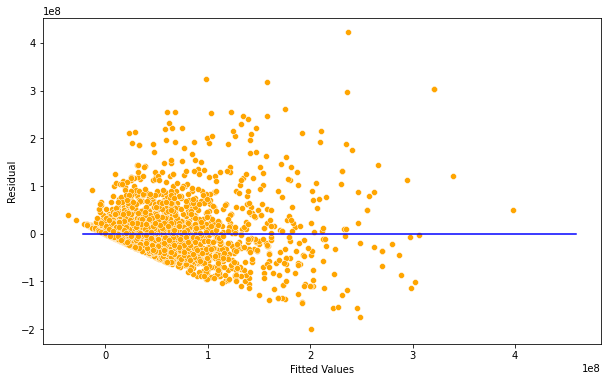

In [171]:
# Plot of fitted values and residuals for regression model
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [predictions.min(),predictions.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

**6. Attempt at Lasso Regression with determined predictors for interpretability, ended in a general failure**

In [172]:
# Creating a range of values of the tuning parameter to visualize the lasso coefficients
# for different values of the tuning parameter
#alphas = 10**np.linspace(0,-2,200)*0.5
alphas = np.linspace(0.000001, 0.2, 21)

In [173]:
# Use cross validation to find the optimal value of the tuning parameter - lambda
# For the optimal lambda, the cross validation error will be the least

# Note that we are reducing the range of alpha so as to better visualize the minimum
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, train_lasso.gross)

# Optimal value of the tuning parameter - lambda
optimal_lasso = lassocv.alpha_

In [174]:
# Using the developed ridge regression model on train data to predict on test data
lasso = Lasso(alpha = optimal_lasso)
lasso.fit(Xstd, train_lasso.gross);

In [175]:
# Computing MAE on test data/validation set
pred_lasso = lasso.predict(Xstd_test)
(np.abs(test_lasso.gross - predictions)).mean()

41299646.47714099

In [176]:
pd.Series(np.abs(lasso.coef_)).sort_values(ascending = True) # Largest values 3, 4
X.columns[np.argmax(lasso.coef_)] 

'director_facebook_likes'

### Data preparation for logistic model development
*By Riley Otsuki*

The following data preparation steps helped us to prepare our data for implementing various regression modeling / validation techniques after all the previous EDA and transformations:

1. Using SMOTE, we oversampled the training data so that there is a 50/50 split between 'good' movies and 'bad' movies.

2. We had to drop na values in te dataset in order to perform SMOTE 

3. Define confusion_matrix_data to calculate confusion matrix for our models 
<br>

In [177]:
# dropping all NA values in dataset
movies_log = movies_log.dropna()

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install imblearn;
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define the target variable and the features
target = 'good_movie'
features = ['duration', 'director_facebook_likes', 'aspect_ratio', 'actors_facebook_likes', 'budget','facenumber_in_poster', 'country_USA', 'country_Others', 'country_UK']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movies_log[features], movies_log[target], test_size=0.3, random_state=42)

# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

train_resampled = pd.concat([X_train_resampled, y_train_resampled.rename('good_movie')], axis=1)

test_log = pd.concat([X_test, y_test.rename('good_movie')], axis = 1)


In [179]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
# Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins = np.array([0,cutoff,1])
# Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index = {0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Logistic Model Development for `good_movie` in iterations
*By Riley Otsuki and Kenneth Yeon*

The following code outlines each iteration of our model, beginning with the baseline.

**Baseline model**

In [180]:
# creating a model using predictors with high correlation
logit_model1 = smf.logit(data = movies_log, formula = 'good_movie ~ duration + director_facebook_likes + country_UK + country_USA + country_Others + aspect_ratio + actors_facebook_likes + budget + facenumber_in_poster').fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.507292
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3747
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.1270
Time:                        10:10:29   Log-Likelihood:                -1905.4
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.459e-114
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.4332        nan        nan        nan         nan   

Classification accuracy = 64.1%
Precision = 84.8%
TPR or Recall = 34.3%
FNR = 65.7%
FPR = 6.2%
ROC-AUC = 78.2%


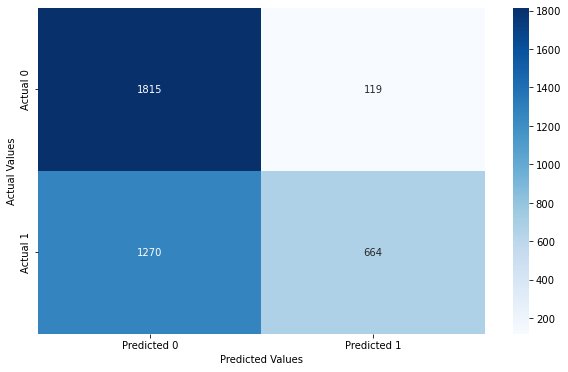

In [181]:
confusion_matrix_data(train_resampled, train_resampled.good_movie, logit_model1, cutoff = 0.46)

Classification accuracy = 76.3%
Precision = 64.7%
TPR or Recall = 31.2%
FNR = 68.8%
FPR = 6.5%
ROC-AUC = 75.5%


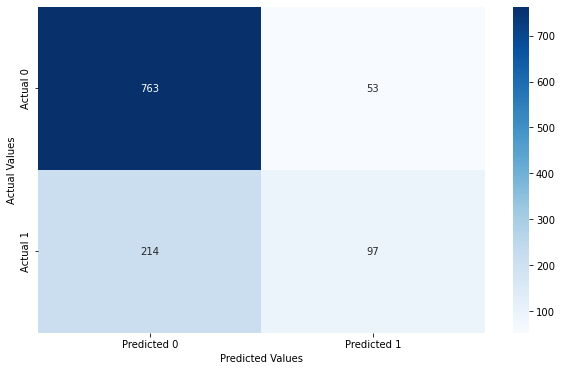

In [182]:
confusion_matrix_data(test_log, test_log.good_movie, logit_model1, cutoff = 0.46)

**Manual Variable Selection Model**

*Removed variables that were statistically insignificant*

In [183]:
# Creating a model that does not include variables that were statistically insignificant
logit_model2 = smf.logit(formula= 'good_movie ~ duration + director_facebook_likes + actors_facebook_likes + budget', data = movies_log).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.528676
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3751
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                 0.09021
Time:                        10:10:34   Log-Likelihood:                -1985.7
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                 6.118e-84
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.4166      0.223    -19.773      0.000      -4.854   

Classification accuracy = 57.6%
Precision = 81.7%
TPR or Recall = 19.6%
FNR = 80.4%
FPR = 4.4%
ROC-AUC = 69.6%


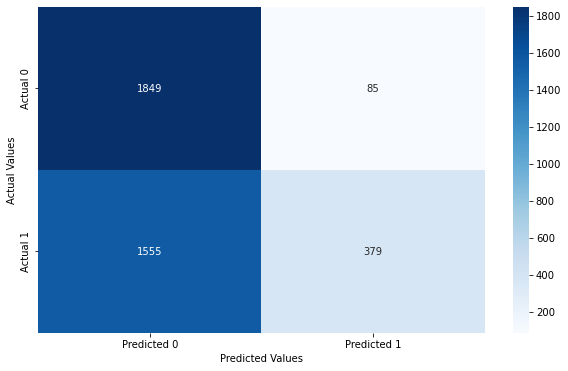

In [184]:
confusion_matrix_data(train_resampled, train_resampled.good_movie, logit_model2, cutoff = 0.46)

Classification accuracy = 76.0%
Precision = 68.5%
TPR or Recall = 24.4%
FNR = 75.6%
FPR = 4.3%
ROC-AUC = 73.4%


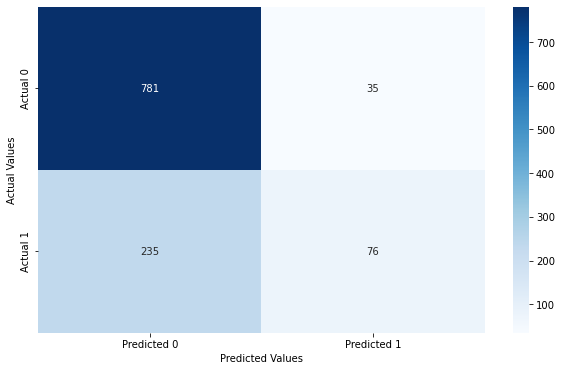

In [185]:
confusion_matrix_data(test_log, test_log.good_movie, logit_model2, cutoff = 0.46)

**Third Model With Interactions**

In [186]:
# Creating a model based off model2, but with some interactions
logit_model3 = smf.logit(formula= 'good_movie ~ duration + director_facebook_likes * actors_facebook_likes + budget + np.log(budget)', data = movies_log).fit()
print(logit_model3.summary())

Optimization terminated successfully.
         Current function value: 0.506078
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3749
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.1291
Time:                        10:10:38   Log-Likelihood:                -1900.8
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.699e-118
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

Classification accuracy = 59.5%
Precision = 81.4%
TPR or Recall = 24.7%
FNR = 75.3%
FPR = 5.6%
ROC-AUC = 74.4%


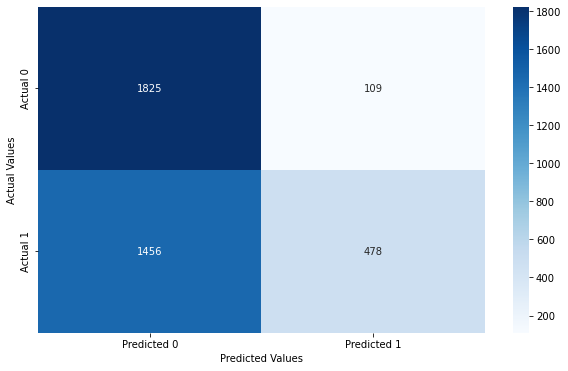

In [187]:
confusion_matrix_data(train_resampled, train_resampled.good_movie, logit_model3, cutoff = 0.46)

Classification accuracy = 77.6%
Precision = 71.0%
TPR or Recall = 31.5%
FNR = 68.5%
FPR = 4.9%
ROC-AUC = 77.0%


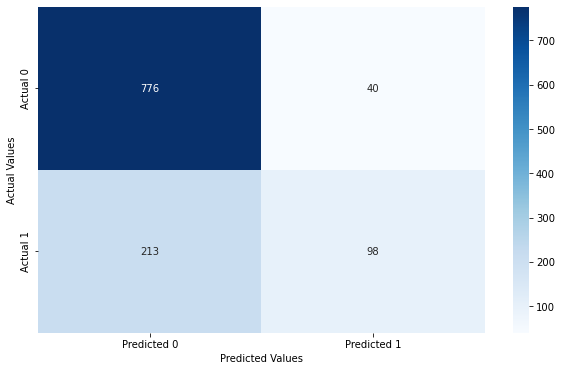

In [188]:
confusion_matrix_data(test_log, test_log.good_movie, logit_model3, cutoff = 0.46)

**Finalizing Model Using Best/Forward Subset Selection**

Optimization terminated successfully.
         Current function value: 0.636772
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.678379
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691563
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691711
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686737
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649015
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3
Processed 8 models on 1 predictors in 0.0369110107421875 seconds.
Optimization terminated successfully.
         Current function value: 0.630423
         Iterations 6
Optimization ter

Optimization terminated successfully.
         Current function value: 0.624425
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573343
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.614781
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620691
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.580027
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.622222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.577762
  

Optimization terminated successfully.
         Current function value: 0.673755
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.623272
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610252
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622859
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.670943
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610165
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606956
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.670488
  

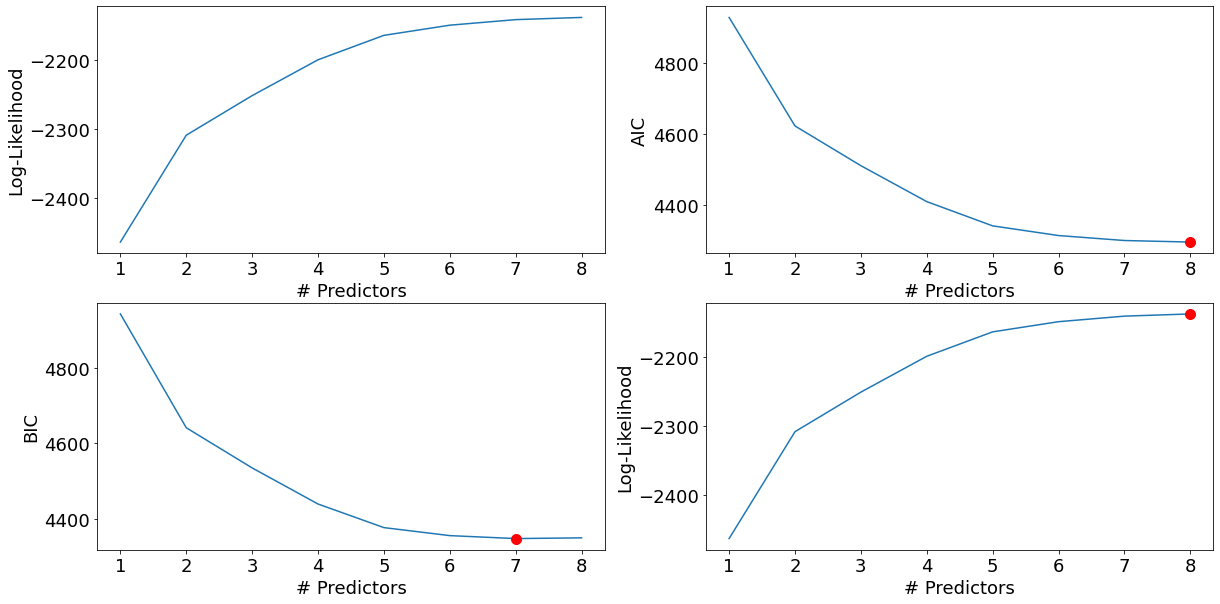

In [189]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

#Creating a set of predictors from which we need to find the best subset of predictors
X = train_resampled[['duration', 'director_facebook_likes', 'aspect_ratio', 'actors_facebook_likes', 'budget', 'facenumber_in_poster', 'country_USA', 'country_Others']]
y = train_resampled['good_movie']

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate log-likelihood
    model = sm.Logit(y, sm.add_constant(train_resampled[predictor_subset])).fit()
    log_likelihood = model.llf
    return {"model":model, "log_likelihood":log_likelihood}

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest log-likelihood
    best_model = models.loc[models['log_likelihood'].argmax()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["log_likelihood", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["log_likelihood"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log-Likelihood')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

    llf = models_best.apply(lambda row: row[1].llf, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(llf)
    plt.plot(1+llf.argmax(), llf.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('Log-Likelihood')

    plt.show()
    
best_sub_plots()

Optimization terminated successfully.
         Current function value: 0.636772
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.678379
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691563
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691711
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686737
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649015
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.630423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625098
  

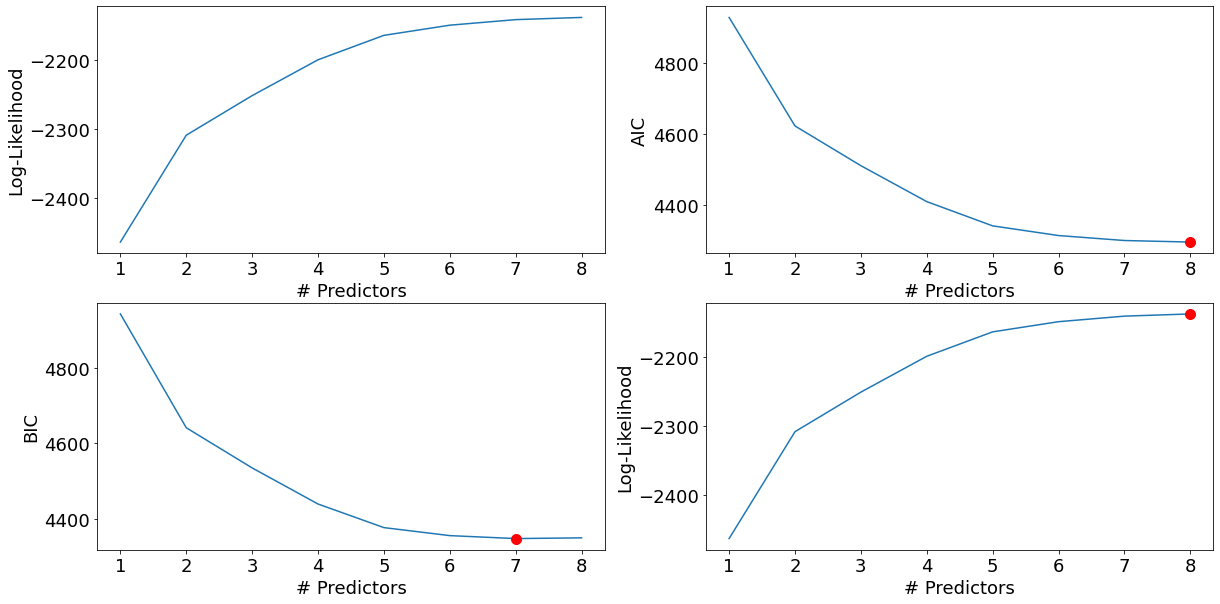

In [190]:
X = train_resampled[['duration', 'director_facebook_likes', 'aspect_ratio', 'actors_facebook_likes', 'budget', 'facenumber_in_poster', 'country_USA', 'country_Others']]

#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['log_likelihood'].argmax()]
    
    
    # Return the best model, along with some other useful information about the model
    return best_model


def forward_selection():
    models_best = pd.DataFrame(columns=["log_likelihood", "model"])

    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    return models_best

models_best = forward_selection()

best_sub_plots()

In [192]:
# The best forward model
best_fwd_reg_model = models_best['model'][7]
print(best_fwd_reg_model.summary())

                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3868
Model:                          Logit   Df Residuals:                     3860
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.2014
Time:                        10:11:09   Log-Likelihood:                -2141.3
converged:                       True   LL-Null:                       -2681.1
Covariance Type:            nonrobust   LLR p-value:                7.268e-229
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1967      0.352      0.559      0.576      -0.492       0.886
duration                    0.0406      0.002     17.602      0.000       0.036       0.045


In [193]:
# Same as best forward model
logit_model4 = smf.logit(formula= 'good_movie ~ director_facebook_likes + country_USA + duration + aspect_ratio + facenumber_in_poster + actors_facebook_likes + budget', data = train_resampled).fit()
print(logit_model4.summary())

Optimization terminated successfully.
         Current function value: 0.565349
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 3868
Model:                          Logit   Df Residuals:                     3860
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.1844
Time:                        10:11:13   Log-Likelihood:                -2186.8
converged:                       True   LL-Null:                       -2681.1
Covariance Type:            nonrobust   LLR p-value:                3.417e-209
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5805      0.346     -1.676      0.094      -1.259   

Classification accuracy = 71.1%
Precision = 70.7%
TPR or Recall = 72.1%
FNR = 27.9%
FPR = 29.9%
ROC-AUC = 78.3%


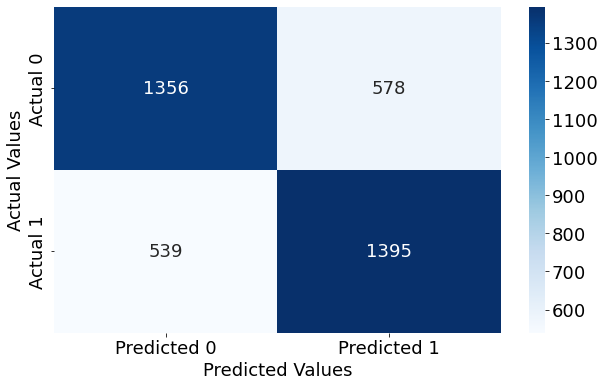

In [194]:
confusion_matrix_data(train_resampled, train_resampled.good_movie, logit_model4, cutoff = 0.46)

Classification accuracy = 69.6%
Precision = 46.3%
TPR or Recall = 65.3%
FNR = 34.7%
FPR = 28.8%
ROC-AUC = 73.4%


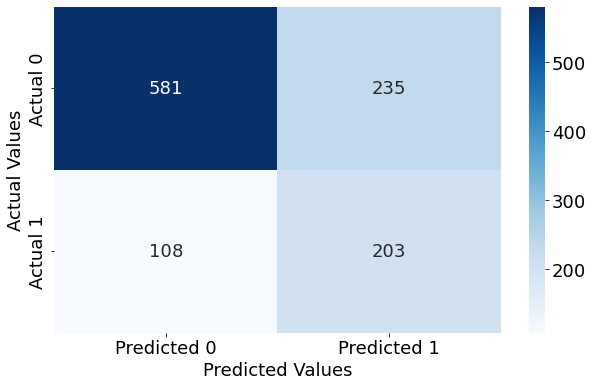

In [195]:
confusion_matrix_data(test_log, test_log.good_movie, logit_model4, cutoff = 0.46)

**Optimizing Decision Threshold**

In [196]:
from sklearn.metrics import precision_recall_curve, auc

# defines the target variable 'y' as the 'good_movie' column in the 'train_resampled' dataframe, and predicts 'y_pred' values using the logistic regression model 'logit_model3'
y = train_resampled.good_movie
y_pred = logit_model3.predict(train_resampled)

# calculates precision, recall, and thresholds using the predicted and actual values, and computes the area under the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_pred)
pr_auc = auc(recall, precision)

# identifies the index of the maximum precision value, and sets the decision threshold for classification to the corresponding value in the 'thresholds' array
max_precision_index = np.argmax(precision[:-1])
decision_threshold = thresholds[max_precision_index]

decision_threshold

0.9521559010186307

Classification accuracy = 52.3%
Precision = 95.9%
TPR or Recall = 4.9%
FNR = 95.1%
FPR = 0.2%
ROC-AUC = 78.3%


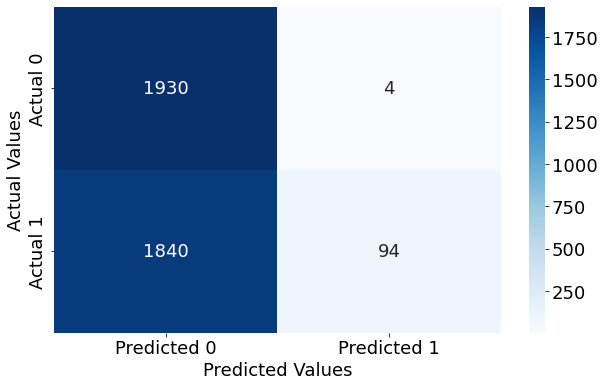

In [197]:
confusion_matrix_data(train_resampled, train_resampled.good_movie, logit_model4, cutoff = decision_threshold)

Classification accuracy = 73.4%
Precision = 72.0%
TPR or Recall = 5.8%
FNR = 94.2%
FPR = 0.9%
ROC-AUC = 73.4%


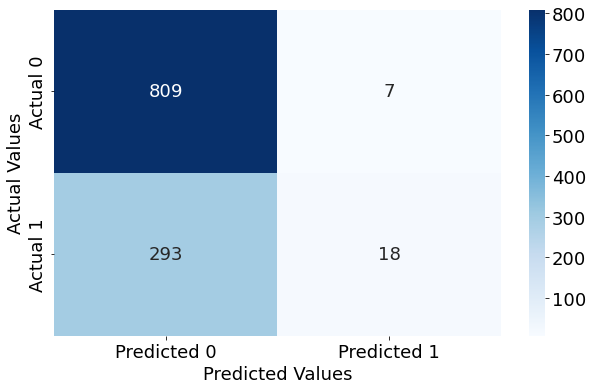

In [198]:
confusion_matrix_data(test_log, test_log.good_movie, logit_model4, cutoff = decision_threshold)

### Code fitting the final model

### Linear Regression Model for `gross`
*By Gabrielle Bliss and Lila Weiner*

The following code outlines our final model. It is fitted here with the `train_filtered` dataset (which includes all necessary transformations and predictors, with dropped influential points.)

In [199]:
model = smf.ols('gross~country_UK+country_USA+(country_USA+country_UK)*budget+budget+np.sqrt(budget)+movie_facebook_likes+cast_total_facebook_likes+director_facebook_likes+(title_year*(Action+Adventure+Family+Fantasy+Animation))+' + '+'.join(['duration'+str(x) for x in range(1,4)]), data = train_filtered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:11:36   Log-Likelihood:                -59459.
No. Observations:                3110   AIC:                         1.190e+05
Df Residuals:                    3086   BIC:                         1.191e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.369e+09    2.4e+08      5.707      0.000    8.99e+08    1.84e+09
country_UK                -2.389e+07   4.81e+06     -4.961      0.000   -3.33e+07   -1.44e+07
country_USA               -5.081e+06    3.1e+06     -1.639      0.101   -1.12e+07    9.98e+05
budget                       -0.0158      0.007     -2.238      0.025      -0.030      -0.002
country_USA:budget            0.8607      0.043     20.070      0.000       0.777       0.945
country_UK:budget             0.9907      0.083     11.924      0.000       0.828       1.154
np.sqrt(budget)            1313.8297    568.206      2.312      0.021     199.730    2427.929
movie_facebook_likes        776.0382     50.024     15.513      0.000     677.955     874.122
cast_total_facebook_likes   249.5284     46.450      5.372      0.000     158.452     340.605
director_facebook_likes     731.5793    305.874      2.392      0.017     131.842    1331.317
title_year                -6.802e+05    1.2e+05     -5.677      0.000   -9.15e+05   -4.45e+05
Action                     1.847e+09   4.66e+08      3.964      0.000    9.34e+08    2.76e+09
Adventure                  4.735e+08   4.68e+08      1.013      0.311   -4.43e+08    1.39e+09
Family                     1.581e+08   6.82e+08      0.232      0.817   -1.18e+09     1.5e+09
Fantasy                    1.502e+09   5.78e+08      2.597      0.009    3.68e+08    2.64e+09
Animation                  -8.92e+08   9.55e+08     -0.934      0.350   -2.76e+09     9.8e+08
title_year:Action         -9.241e+05   2.33e+05     -3.972      0.000   -1.38e+06   -4.68e+05
title_year:Adventure      -2.344e+05   2.34e+05     -1.004      0.316   -6.92e+05    2.24e+05
title_year:Family         -7.157e+04   3.41e+05     -0.210      0.834    -7.4e+05    5.97e+05
title_year:Fantasy        -7.486e+05   2.89e+05     -2.594      0.010   -1.31e+06   -1.83e+05
title_year:Animation       4.508e+05   4.76e+05      0.946      0.344   -4.83e+05    1.38e+06
duration1                  3.873e+06   2.87e+06      1.349      0.177   -1.75e+06     9.5e+06
duration2                 -7.314e+05    3.1e+06     -0.236      0.813   -6.81e+06    5.35e+06
duration3                  1.217e+07   3.32e+06      3.665      0.000    5.66e+06    1.87e+07
==============================================================================
Omnibus:                     1393.560   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11998.896
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                      11.825   Cond. No.                     3.02e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

### Logistic Regression Model for `good_movie`
*By Riley Otsuki and Kenneth Yeon*

The following code outlines our final model.

In [200]:
# The final model
logit_model = smf.logit(formula= 'good_movie ~ director_facebook_likes + country_USA + duration + aspect_ratio + facenumber_in_poster + actors_facebook_likes + budget', data = train_resampled).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.565349
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             good_movie   No. Observations:                 3868
Model:                          Logit   Df Residuals:                     3860
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.1844
Time:                        10:11:40   Log-Likelihood:                -2186.8
converged:                       True   LL-Null:                       -2681.1
Covariance Type:            nonrobust   LLR p-value:                3.417e-209
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5805      0.346     -1.676      0.094      -1.259       0.098
director_facebook_likes     0.0001    1.5e-05      7.514      0.000    8.33e-05       0.000
country_USA                -1.4231      0.084    -16.945      0.000      -1.588      -1.259
duration                    0.0422      0.002     18.258      0.000       0.038       0.047
aspect_ratio               -1.4021      0.151     -9.299      0.000      -1.698      -1.107
facenumber_in_poster       -0.1123      0.022     -5.086      0.000      -0.156      -0.069
actors_facebook_likes      -0.2258      0.084     -2.703      0.007      -0.389      -0.062
budget                  -2.277e-09   6.07e-10     -3.754      0.000   -3.47e-09   -1.09e-09
===========================================================================================
"""

## Conclusions and Recommendations to stakeholder(s)

### Odds for classification
*By Kenneth Yeon*

In [201]:
# Calculating odds
for predictor, coef in logit_model.params.items():
    if predictor == 'Intercept':
        continue  # skip the intercept term
    odds_ratio = np.exp(coef)
    print(f"With a one-unit increase in {predictor}, the odds of 'good_movie' changes by {odds_ratio:.2f}")

With a one-unit increase in director_facebook_likes, the odds of 'good_movie' changes by 1.00
With a one-unit increase in country_USA, the odds of 'good_movie' changes by 0.24
With a one-unit increase in duration, the odds of 'good_movie' changes by 1.04
With a one-unit increase in aspect_ratio, the odds of 'good_movie' changes by 0.25
With a one-unit increase in facenumber_in_poster, the odds of 'good_movie' changes by 0.89
With a one-unit increase in actors_facebook_likes, the odds of 'good_movie' changes by 0.80
With a one-unit increase in budget, the odds of 'good_movie' changes by 1.00


### Budget predictors, average increase in `gross`
*By Gabrielle Bliss*

In [210]:
budget = movies.budget.mean()
print(model.params['budget']*budget + model.params['budget']*np.sqrt(budget) + model.params['country_USA:budget']*budget + model.params['country_USA'])
budget = budget + 1
print(model.params['budget']*(budget) + model.params['budget']*np.sqrt(budget) + model.params['country_USA:budget']*(budget) + model.params['country_USA'])

28508186.48925356
28508187.3342012


In [211]:
budget = movies.budget.mean()
print(model.params['budget']*budget + model.params['budget']*np.sqrt(budget) + model.params['country_UK:budget']*budget + + model.params['country_UK'])
budget = budget + 1
print(model.params['budget']*budget + model.params['budget']*np.sqrt(budget) + model.params['country_UK:budget']*budget + + model.params['country_UK'])

14870561.069794267
14870562.04474926


In [212]:
budget = movies.budget.mean()
print(model.params['budget']*budget + model.params['budget']*np.sqrt(budget))
budget = budget + 1
print(model.params['budget']*budget + model.params['budget']*np.sqrt(budget))

-626457.8906447196
-626457.9064023781
